In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/Users/parthsharma/Desktop/Data Science CB/mnist2_train.csv')

In [3]:
data.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data=data.values

In [5]:
X=data[ : ,1: ]
Y=data[ : ,0]

In [6]:
split=int(.80*X.shape[0])

In [7]:
x_train,y_train=X[ :split, : ],Y[ :split]
x_test,y_test=X[split: , : ],Y[split : ]
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


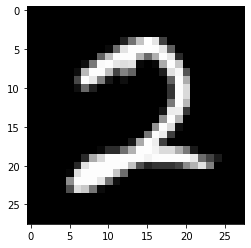

In [8]:
plt.imshow(x_test[90].reshape(28,28),cmap='gray')

In [9]:
x=x_test.reshape(-1,28*28)



In [10]:
y=y_test

### PREPROSSESING

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc=StandardScaler()

In [13]:
x_=sc.fit_transform(x)

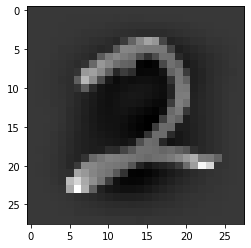

In [14]:
plt.imshow(x_[90].reshape(28,28),cmap='gray')

### Sk-learn PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca=PCA(n_components=2)

In [17]:
z_pca=pca.fit_transform(x_)

In [18]:
z_pca.shape

(8400, 2)

In [19]:
z_pca

array([[20.75949357, -0.72280987],
       [-1.57711693,  4.46970414],
       [-6.84737278,  1.85670196],
       ...,
       [ 0.51598722,  6.88248509],
       [ 2.25355471, -4.29075503],
       [-4.79550747,  1.5137744 ]])

In [20]:
x_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
#if orignal data had 100% variance new compressed data has 42+28=70% variacnce or orginal data
pca.explained_variance_ 

array([42.34445302, 28.78019086])

### PCA ALGORITHM

In [22]:
#step -2 compute covarinace matrix

In [23]:
covariance = np.dot(x_.T,x_)

In [24]:
covariance.shape

(784, 784)

In [25]:
#step 3 compute eigonvector using SVD
from numpy.linalg import svd

In [26]:
U,S,V=svd(covariance)

In [27]:
U.shape

(784, 784)

In [28]:
Ured= U[:,:2]

In [29]:
Ured.shape

(784, 2)

In [30]:
#Step 4 - Projection of data on new axis 
Z=np.dot(x_,Ured)

In [31]:
Z.shape

(8400, 2)

In [32]:
Z

array([[-20.75950494,   0.72291633],
       [  1.57713259,  -4.47021078],
       [  6.84737225,  -1.85700248],
       ...,
       [ -0.51599232,  -6.88288518],
       [ -2.25356852,   4.29087713],
       [  4.79549684,  -1.51368956]])

### Data Visualisation (PCA with 2 components)

In [33]:
df=np.hstack((Z,y.reshape(-1,1)))

In [34]:
df=pd.DataFrame(df,columns=['PC1','PC2','Label'])

In [35]:
df.head()

,PC1,PC2,Label
0,-20.759505,0.722916,0.0
1,1.577133,-4.470211,7.0
2,6.847372,-1.857002,7.0
3,-6.571688,0.427609,2.0
4,-1.152728,0.475057,2.0


<Figure size 1080x1080 with 0 Axes>

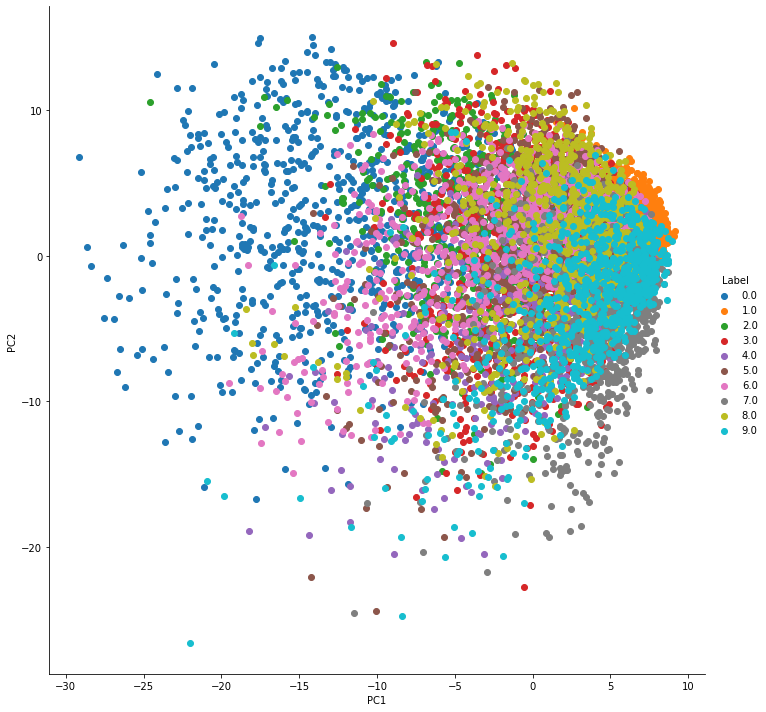

In [36]:
import seaborn as sns
plt.figure(figsize=(15,15))
fg=sns.FacetGrid(df,hue='Label',height=10)
fg.map(plt.scatter,'PC1','PC2')
fg.add_legend()
plt.show()

### PCA with 784 Components

In [37]:
pca=PCA()

In [39]:
z_pca=pca.fit_transform(x_)

In [40]:
z_pca.shape

(8400, 784)

In [41]:
pca.explained_variance_

array([4.23444530e+01, 2.87801911e+01, 2.63532828e+01, 2.08471118e+01,
       1.87232007e+01, 1.61050127e+01, 1.36603096e+01, 1.23702149e+01,
       1.09851215e+01, 1.04518834e+01, 9.76519716e+00, 8.83534367e+00,
       8.19214729e+00, 7.80121448e+00, 7.40202506e+00, 7.17738396e+00,
       6.88495793e+00, 6.69744755e+00, 6.53560297e+00, 6.37551137e+00,
       6.19371327e+00, 5.88337723e+00, 5.59863298e+00, 5.40040244e+00,
       5.25886068e+00, 5.16945649e+00, 4.97323792e+00, 4.82208652e+00,
       4.71603440e+00, 4.52942996e+00, 4.40945823e+00, 4.37774972e+00,
       4.10747591e+00, 4.10268214e+00, 4.05102212e+00, 3.95092186e+00,
       3.86622503e+00, 3.83170898e+00, 3.74605170e+00, 3.60856073e+00,
       3.54232737e+00, 3.46636539e+00, 3.40834134e+00, 3.37320990e+00,
       3.23635925e+00, 3.21682710e+00, 3.15378441e+00, 3.09855391e+00,
       3.05237660e+00, 3.04164628e+00, 3.00747184e+00, 2.92056369e+00,
       2.89936971e+00, 2.85767572e+00, 2.84054211e+00, 2.75403089e+00,
      

In [43]:
cum_variance=np.cumsum(pca.explained_variance_ratio_)

In [44]:
cum_variance

array([0.06347738, 0.10662095, 0.14612642, 0.17737774, 0.20544516,
       0.22958774, 0.25006552, 0.26860936, 0.28507685, 0.30074497,
       0.31538371, 0.32862852, 0.34090914, 0.35260372, 0.36369989,
       0.3744593 , 0.38478035, 0.39482031, 0.40461764, 0.41417499,
       0.42345982, 0.43227942, 0.44067217, 0.44876777, 0.45665118,
       0.46440056, 0.4718558 , 0.47908446, 0.48615413, 0.49294407,
       0.49955417, 0.50611673, 0.51227413, 0.51842435, 0.52449712,
       0.53041984, 0.53621559, 0.54195959, 0.5475752 , 0.55298469,
       0.55829489, 0.56349122, 0.56860057, 0.57365725, 0.57850879,
       0.58333104, 0.58805879, 0.59270375, 0.59727948, 0.60183913,
       0.60634754, 0.61072568, 0.61507204, 0.6193559 , 0.62361408,
       0.62774257, 0.6318552 , 0.63585004, 0.63982043, 0.64372412,
       0.64752457, 0.65129542, 0.6550191 , 0.6586944 , 0.66226677,
       0.66577782, 0.66923881, 0.6726613 , 0.67607033, 0.67943552,
       0.68277469, 0.68607155, 0.68929833, 0.69251472, 0.69568

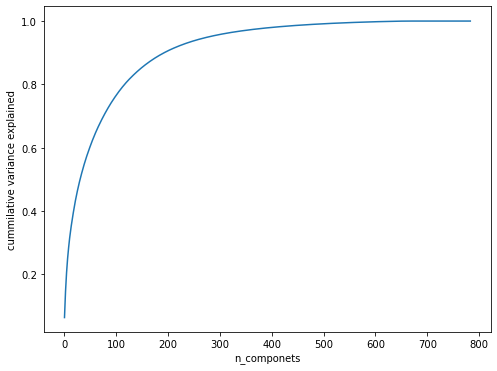

In [47]:
plt.figure(figsize=(8,6))
plt.plot(cum_variance)
plt.xlabel('n_componets')
plt.ylabel('cummilative variance explained')
plt.show()
# It is giving 90 percent varinces in 200 features 